# **Lane Line Detection for Autonomous Cars** 
***

**Note: If, at any point, you encounter frozen display windows or other confounding issues, you can always start again with a clean slate by going to the "Kernel" menu above and selecting "Restart & Clear Output".**

---

**Run the cell below to import some packages.  If you get an `import error` for a package you've already installed, try changing your kernel (select the Kernel menu above --> Change Kernel).  Still have problems?  Try relaunching Jupyter Notebook from the terminal prompt.

## Import Packages

In [31]:
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
%matplotlib inline

## Read in an Image

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)


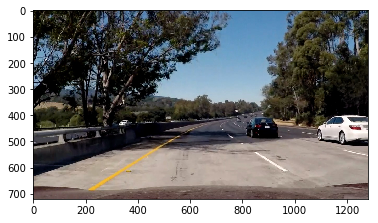

In [52]:
#reading in an image
image = mpimg.imread('test_images/test5.jpg')

#printing out some stats and plotting
print('This image is:', type(image), 'with dimesions:', image.shape)
plt.imshow(image) 

## Test Images

Built my pipeline to work on the images in the directory "test_images"

In [33]:
import os

# capture test images file name in an array
os.listdir("test_images/")

['straight_lines1.jpg',
 'straight_lines2.jpg',
 'test1.jpg',
 'test2.jpg',
 'test3.jpg',
 'test4.jpg',
 'test5.jpg',
 'test6.jpg']

# Camera Calibration

Calculate the correct camera matrix and distortion coefficients using the calibration chessboard images in the directory "camera_cal"

In [34]:
# list of calibration images file names
os.listdir("camera_cal/") 

['calibration1.jpg',
 'calibration10.jpg',
 'calibration11.jpg',
 'calibration12.jpg',
 'calibration13.jpg',
 'calibration14.jpg',
 'calibration15.jpg',
 'calibration16.jpg',
 'calibration17.jpg',
 'calibration18.jpg',
 'calibration19.jpg',
 'calibration2.jpg',
 'calibration20.jpg',
 'calibration3.jpg',
 'calibration4.jpg',
 'calibration5.jpg',
 'calibration6.jpg',
 'calibration7.jpg',
 'calibration8.jpg',
 'calibration9.jpg']

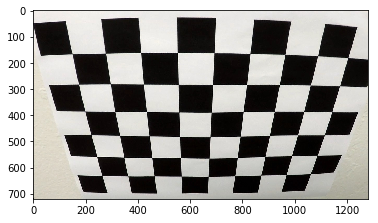

In [36]:
# show one of the calibration images
img = mpimg.imread('camera_cal/calibration9.jpg')
plt.imshow(img)

## Finding Corners in Calibration Images

In [37]:
print('Finding corners in all calibration images...')

# Arrays to store object points and image points from all the calibration images
objpoints = [] # 3D points in real world space
imgpoints = [] # 2D points in image plane

# Prepare object points, like (0,0,0), (1,0,0), (2,0,0), ..., (9,5,0)
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2) # x,y coordinates

nx = 9 # number of chessboard inside corners in x
ny = 6 # number of chessboard inside corners in y
    
# Make a list of calibration images file names
calibration_images_names = os.listdir("camera_cal/")

for calibration_image_name in calibration_images_names:
    # Read each image
    img = cv2.imread('camera_cal/' + calibration_image_name)
    
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)
    
    # If corners are found
    if ret == True:
        # add object points, image points
        imgpoints.append(corners)
        objpoints.append(objp)

print('Successfully found corners in all calibration images')

Finding corners in all calibration images...
Successfully found corners in all calibration images


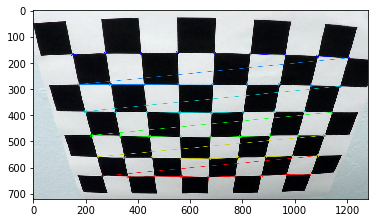

In [38]:
# Draw and display the corners in the last calibration image as an example
img = cv2.drawChessboardCorners(img, (nx, ny), corners, ret)
plt.imshow(img)

## Correcting for Distortion

In [40]:
# This function takes an image, object points, and image points,
# performs the camera calibration and image distortion correction and 
# returns the undistorted image
def cal_undistort(img, objpoints, imgpoints):
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img.shape[0:2], None, None)
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    return undist

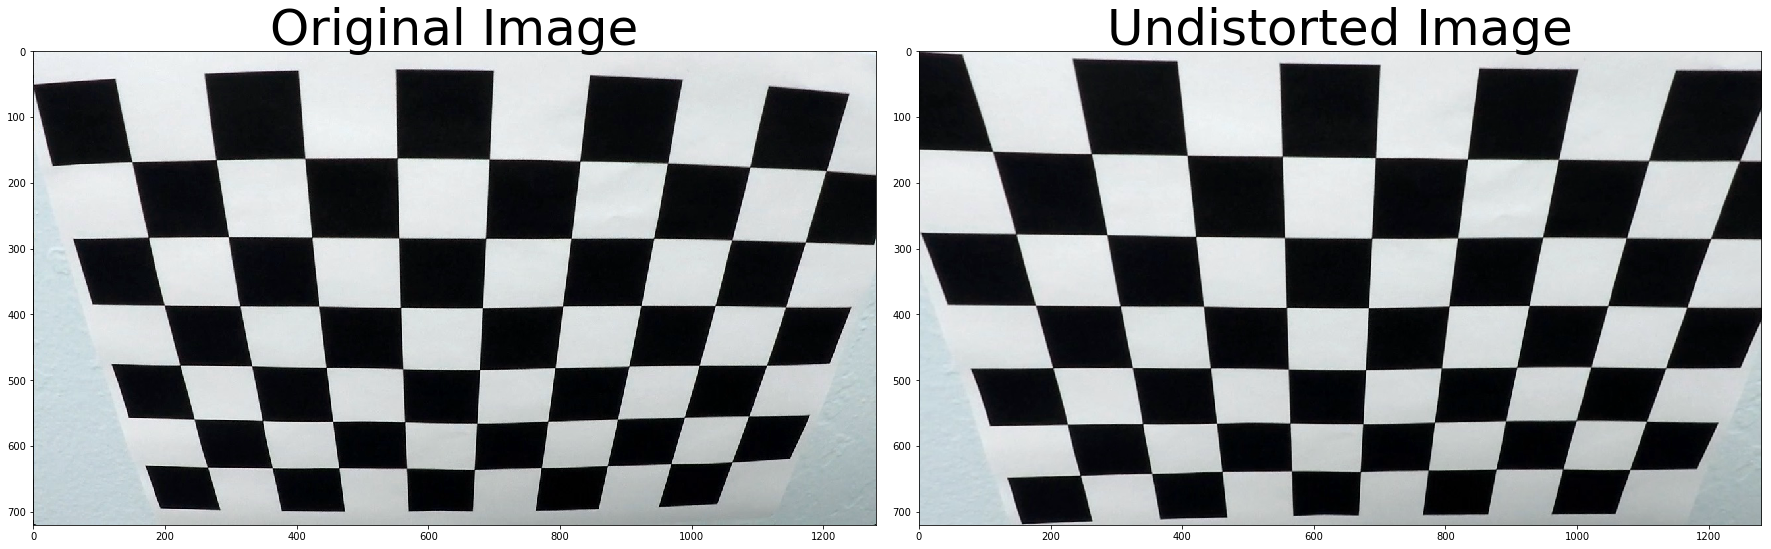

In [47]:
# test distortion correction on a checkboard image

# Read image
img = cv2.imread('camera_cal/calibration9.jpg')

# Return undistorted image
undistorted = cal_undistort(img, objpoints, imgpoints)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(undistorted)
ax2.set_title('Undistorted Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

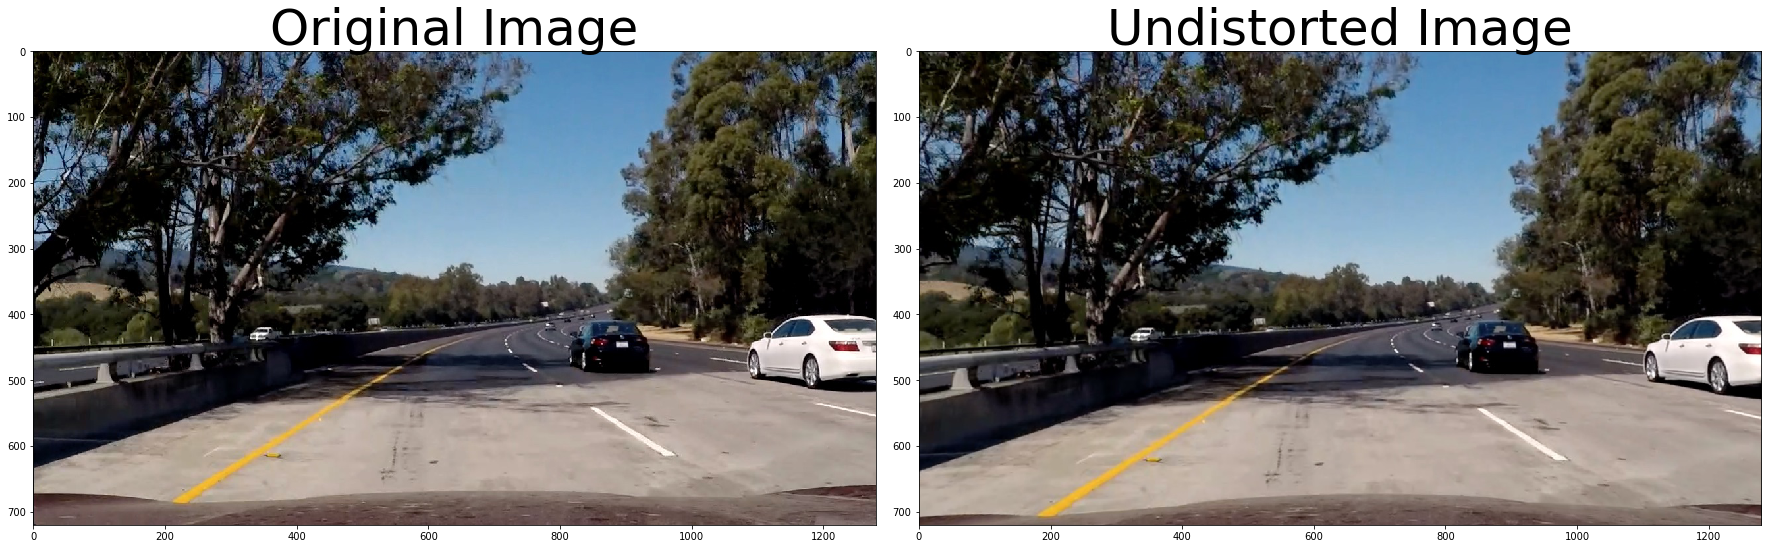

In [51]:
# test distortion correction on a test image

# Read image
img = mpimg.imread('test_images/test5.jpg')

# Return undistorted image
undistorted = cal_undistort(img, objpoints, imgpoints)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(undistorted)
ax2.set_title('Undistorted Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)